In [42]:
import numpy as np
from numpy.fft import rfft
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

## Преобразование Фурье

Преобразование Фурье - это математическая операция, которая дает по одному сигналу (зависимость амплитуды от времени) другой (зависимость амплитуды от частоты). Предполагается, что в любом сигнале можно выделить компоненты разных частот, приблизить исходный сигнал комбинацией синусов и косинусов разной амплитуды и частоты. Преобразование Фурье этим и занимается.

Возьмем одну синусоиду и посмотрим на ее преобразование Фурье.

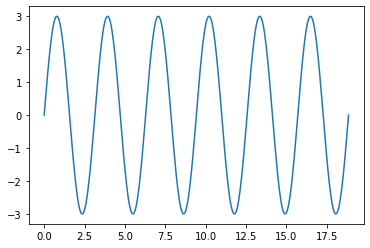

In [54]:
X = np.linspace(0, 6 * np.pi, 400)
y = 3 * np.sin(2 * X)

plt.plot(X, y);

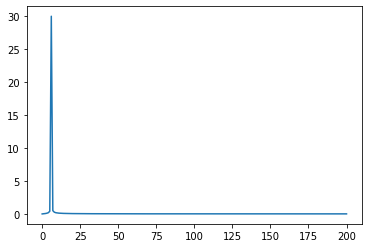

In [55]:
fourier = np.fft.rfft(y, norm='ortho')
plt.plot(np.abs(fourier));

Как можно заметить, в так называемом Фурье-спектре всего один пик, который и отвечает исходной синусоиде.

Теперь возьмем сумму двух синусоид, также посмотрим на их преобразование Фурье.

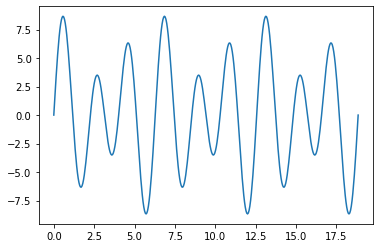

In [56]:
y = 3 * np.sin(2 * X) + 6 * np.sin(3 * X)
plt.plot(X, y);

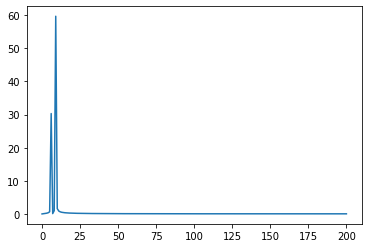

In [57]:
fourier = np.fft.rfft(y, norm='ortho')
plt.plot(np.abs(fourier));

Теперь в спектре два пика (так как в исходном сигнале две синусоиды), причем относительная высота пиков отличается в два раза (как амплитуда исходных синусов).

Посмотрим, как можно искать преобразование Фурье сразу от нескольких сигналов одновременно. 

In [58]:
x = np.linspace(0, 2*np.pi, 50)   # 50 точек от 0 до двух пи
a = np.array([x**2 + 5, np.sin(x / 4)]) # два сигнала, записанные по строчкам массива
a.shape

(2, 50)

In [60]:
fourier = np.fft.rfft(a, axis=1)
fourier.shape

(2, 26)

Для каждой строки исходного массива получили новую, преобразованную.

__Важное замечание__: при преобразовании Фурье количество значений уменьшается примерно в два раза. В данном случае для каждого из двух сигналов исходное число значений было 50, после ПФ стало 26.

## Нахождение числа максимумов

Бывает полезным признак, который содержит в себе число максимумов в сигнале. Посмотрим, как он вычисляется на примере.

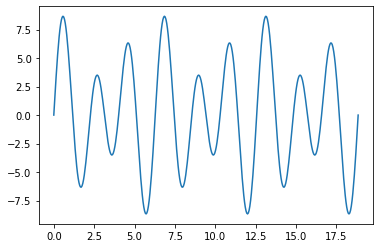

In [61]:
y = 3 * np.sin(2 * X) + 6 * np.sin(3 * X)
plt.plot(X, y);

За вычисление номеров значений, где находятся максимумы, отвечает функция `scipy.signal.find_peaks`.

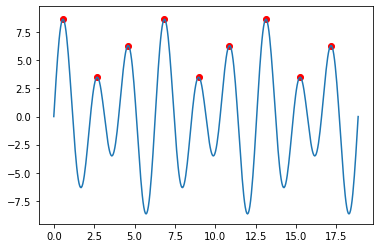

In [65]:
peaks, _ = find_peaks(y)
plt.plot(X, y)
plt.scatter(X[peaks], y[peaks], c='r');